In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [72]:
#Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Encode Clicked on Ad column
# df['Clicked on Ad'] = df['Clicked on Ad'].map({'No':0,'Yes':1})
# df['Clicked on Ad'] = df['Clicked on Ad'].astype('category')

# EDA

In [73]:
cat = [i for i in df.columns if df[i].dtype=='O']
num = [i for i in df.columns if (df[i].dtype=='float64') or (df[i].dtype=='int64')]
num

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Univariate Analysis

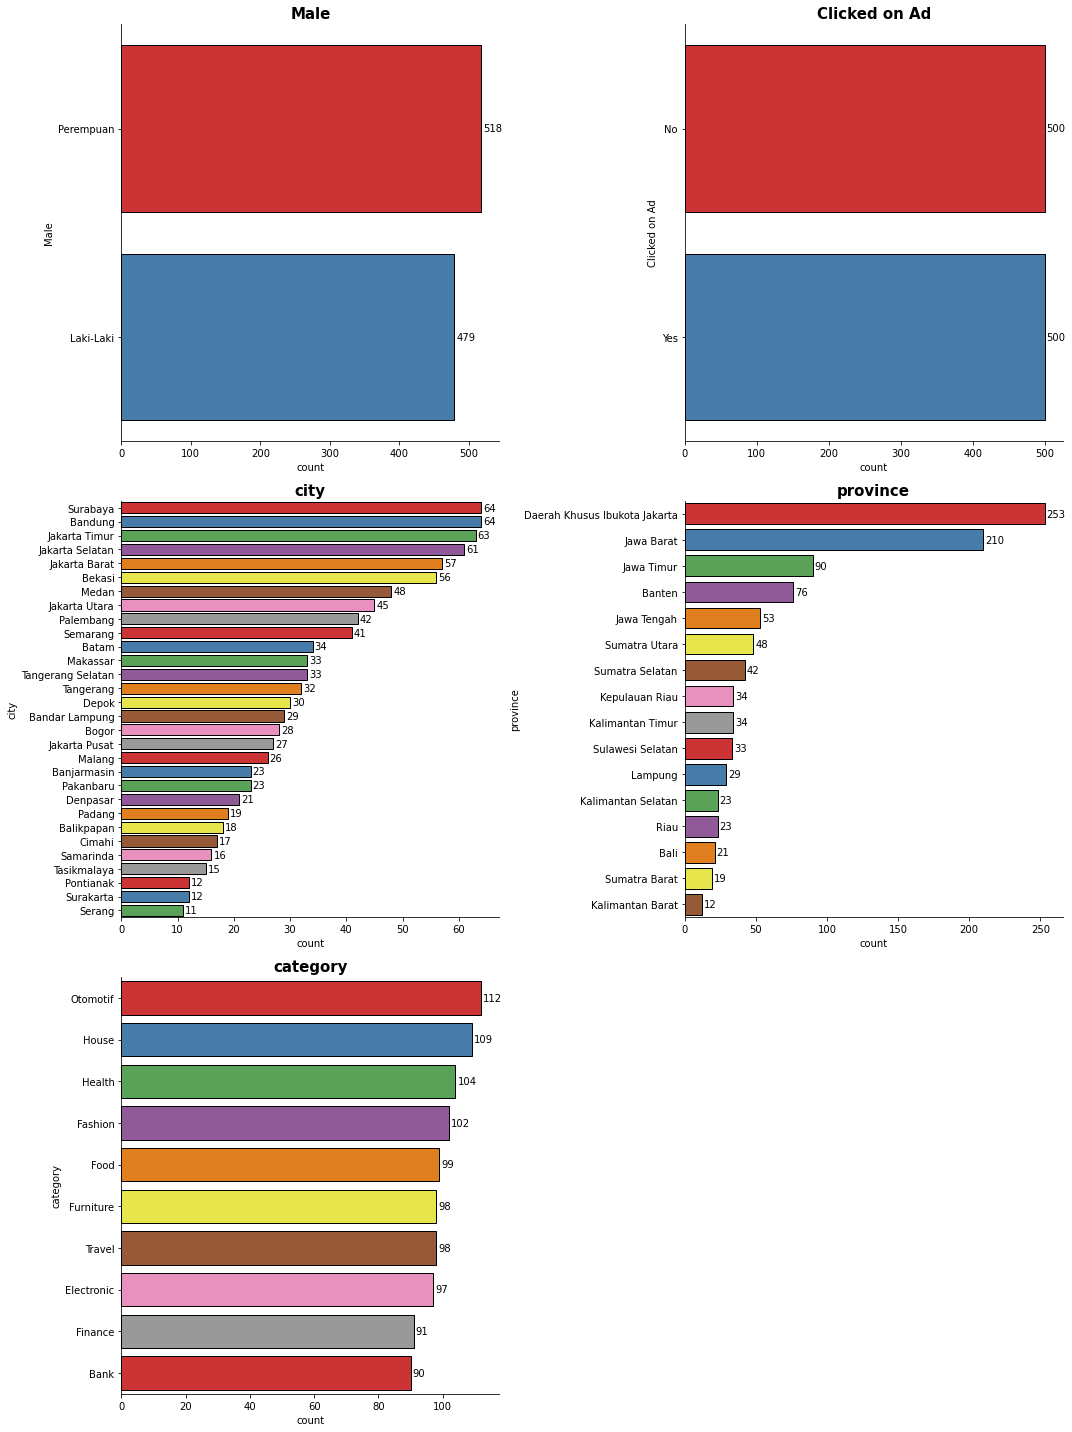

In [74]:
plt.figure(figsize=(15,20))
for i in range(len(cat)):
    plt.subplot(3,2, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='Set1', order=df[cat[i]].value_counts().index,edgecolor='black')
    plt.bar_label(ax.containers[0], padding=2)
    ax.set_title(cat[i], fontsize=15, color='black', weight='bold')
sns.despine()
plt.tight_layout()
plt.show()

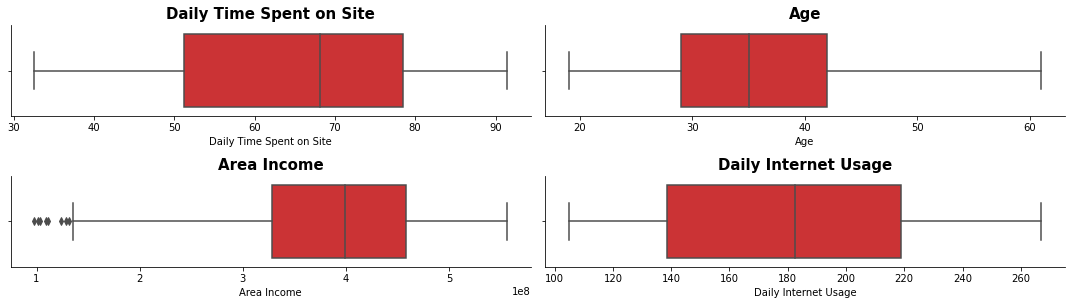

In [83]:
plt.figure(figsize=(15,6))
for i in range(len(num)):
    plt.subplot(3,2, i+1)
    ax = sns.boxplot(x=num[i], data=df, palette='Set1')
    ax.set_title(num[i], fontsize=15, color='black', weight='bold')
    # plt.bar_label(ax.containers[0], padding=2)
    # plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
plt.show()

## Bivariate Analysis

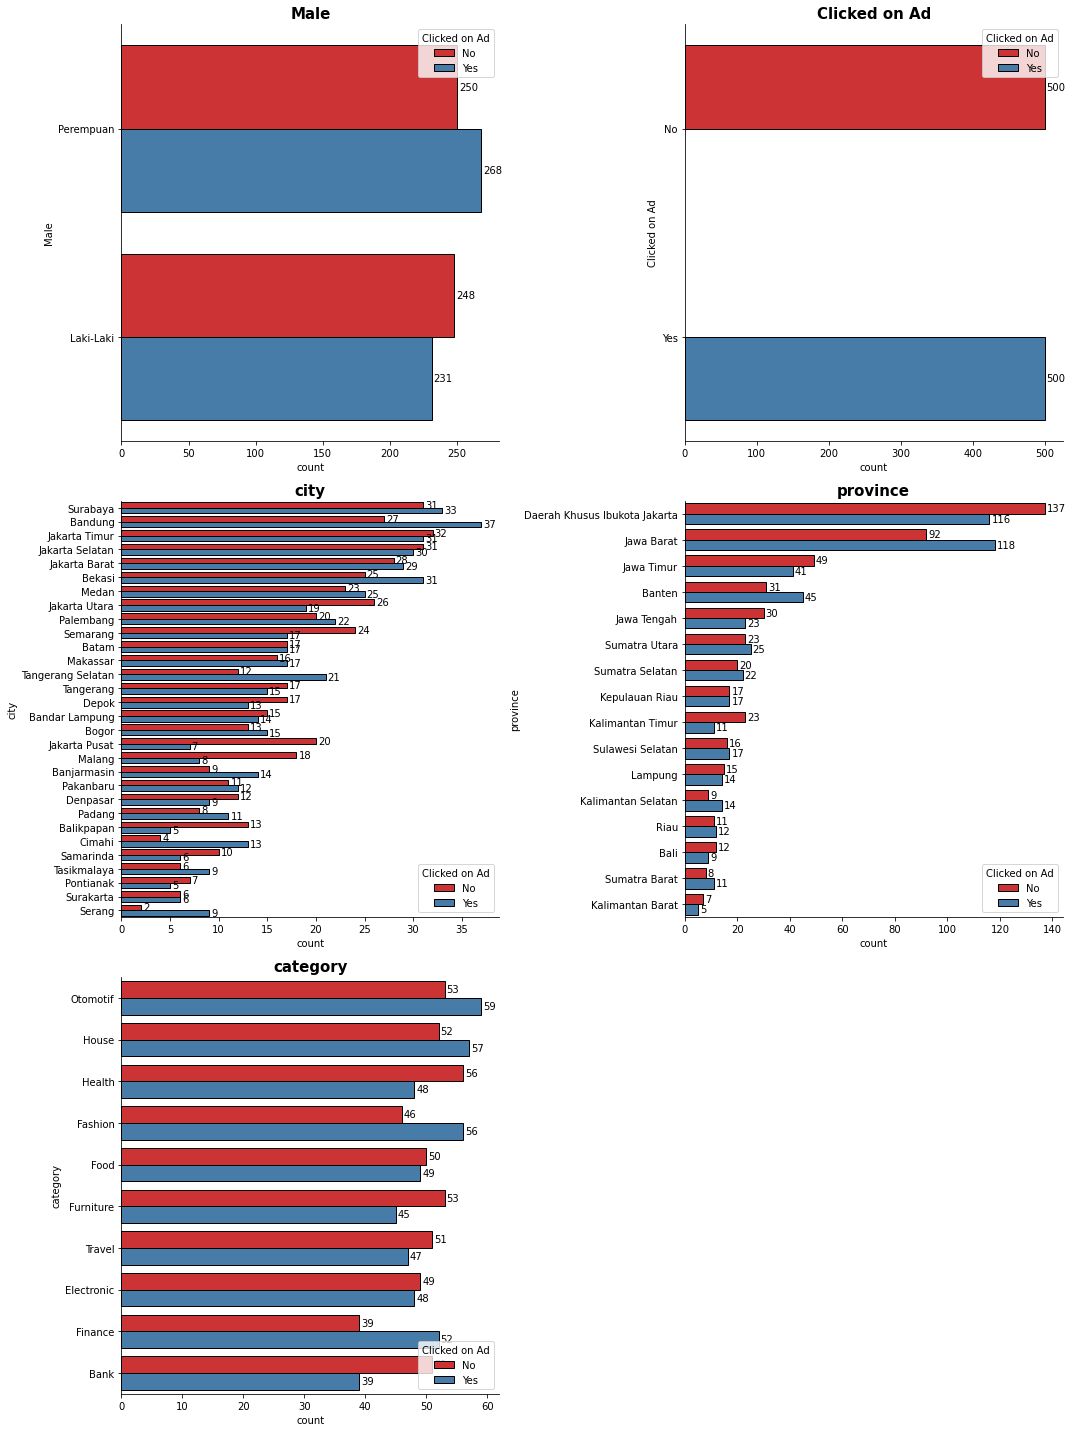

In [75]:
plt.figure(figsize=(15,20))
for i in range(len(cat)):
    plt.subplot(3,2, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='Set1', order=df[cat[i]].value_counts().index,edgecolor='black',hue='Clicked on Ad')
    plt.bar_label(ax.containers[0], padding=2)
    plt.bar_label(ax.containers[1], padding=2)
    ax.set_title(cat[i], fontsize=15, color='black', weight='bold')
sns.despine()
plt.tight_layout()
plt.show()

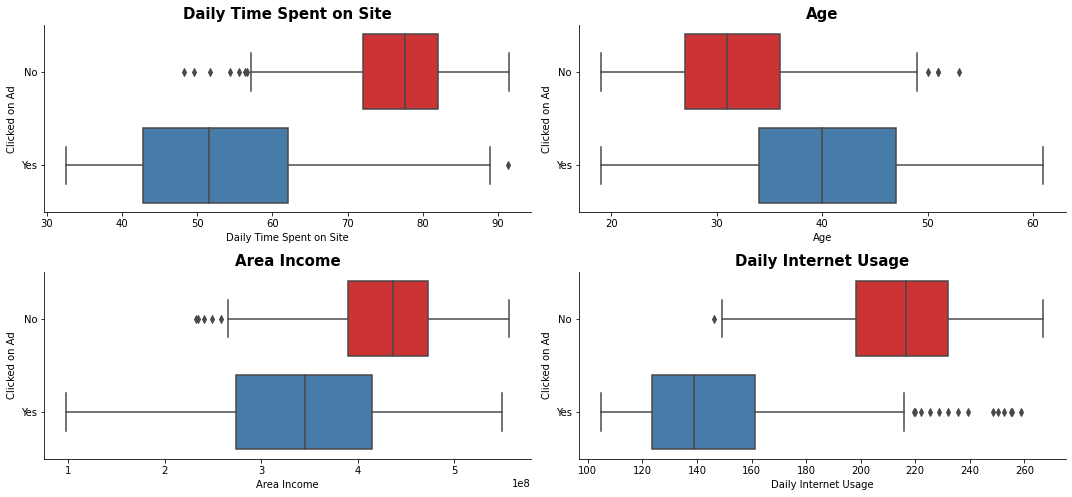

In [76]:
plt.figure(figsize=(15,10))
for i in range(len(num)):
    plt.subplot(3,2, i+1)
    ax = sns.boxplot(x=num[i], data=df, palette='Set1',y='Clicked on Ad')
    ax.set_title(num[i], fontsize=15, color='black', weight='bold')
    # plt.bar_label(ax.containers[0], padding=2)
    # plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
plt.show()

## Multivariate Analysis

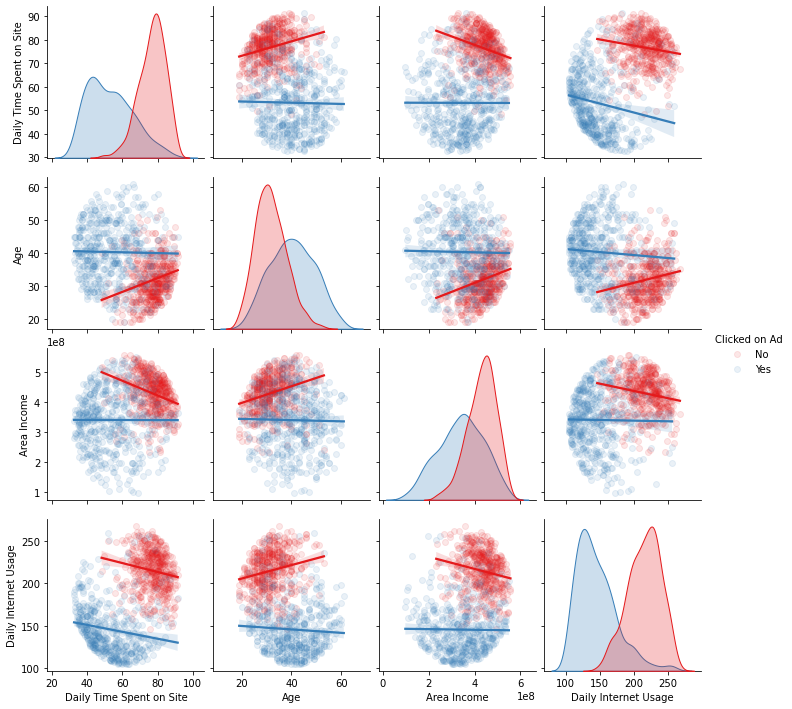

In [77]:
sns.pairplot(df,hue='Clicked on Ad',kind='reg',diag_kind='kde',palette='Set1',plot_kws={'scatter_kws':{'alpha': 0.1}})
plt.show()

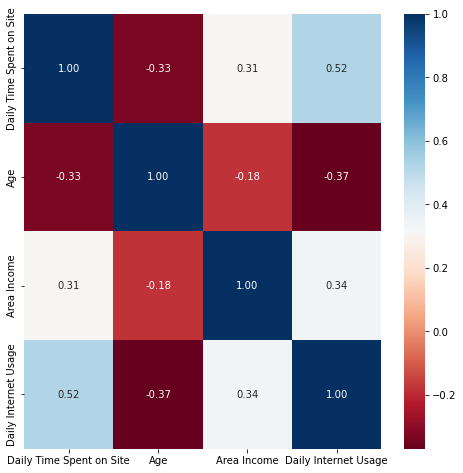

In [78]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt='.2f')
plt.show()